# Hands-On-AI-In-Cyber
**Network Anomaly Detection** 


In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import accuracy_score, precision_recall_curve

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Load the data.
dataset = pd.read_csv('data/network-logs.csv')

### Verteilung der Labels Plotten
Wie viele Anomalies gibt es im Datenset?

0    393
1     12
Name: ANOMALY, dtype: int64

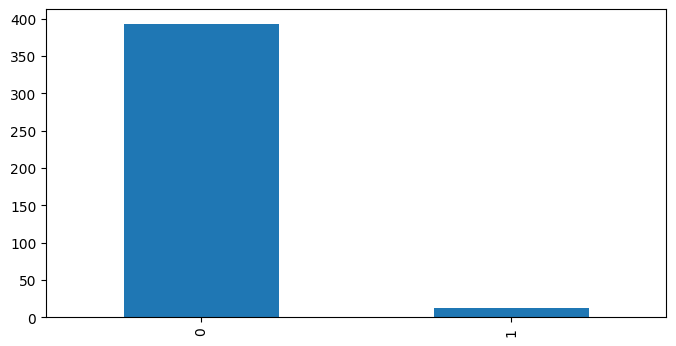

In [16]:
dataset.ANOMALY.value_counts().plot.bar(figsize=(8,4))
dataset.ANOMALY.value_counts()

In [2]:
dataset.head(5)

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
0,21,15.942875,16.202998,0
1,20,12.666451,15.899084,1
2,80,13.894550,12.958008,0
3,21,13.620813,15.459475,0
4,21,15.705485,15.339565,0


### Gibt es Probleme bei der Anzahl der Datensamples?
Wie können wir dieses Problem angehen? Müssen wir es angehen?

### Datenset aufsplitten

In [43]:
samples = dataset.iloc[:, [1, 2]].values
targets = dataset['ANOMALY'].values

In [44]:
training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.3, random_state=0)

In [ ]:
# Soll ich das beachten? Oder lassen wir das aus?
dataset_majority = dataset[dataset['ANOMALY']==0]
dataset_minority = dataset[dataset['ANOMALY']==1]

# Upsample the minority class to have the same number of instances as the majority class
dataset_minority_upsampled = dataset_minority.sample(len(dataset_majority), replace=True)

# Combine the upsampled minority class with the majority class
dataset_balanced = pd.concat([dataset_majority, dataset_minority_upsampled])

# Shuffle the data to avoid introducing any bias
dataset_balanced = dataset_balanced.sample(frac=1, random_state=42)

### Klassifizieren

In [51]:
# k-Nearest Neighbors model
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(training_samples,training_targets)
knc_prediction = knc.predict(testing_samples)
knc_accuracy = 100.0 * accuracy_score(testing_targets, knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))


K-Nearest Neighbours accuracy: 95.90163934426229


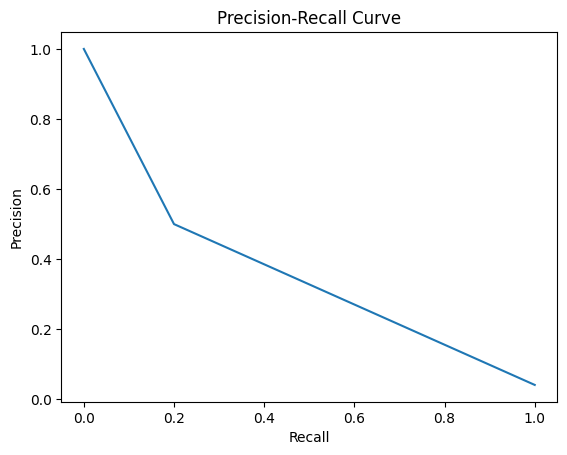

In [59]:
precision, recall, thresholds = precision_recall_curve(testing_targets, knc_prediction)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [53]:
# Decision tree model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(training_samples,training_targets)
dtc_prediction = dtc.predict(testing_samples)
dtc_accuracy = 100.0 * accuracy_score(testing_targets, dtc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))

Decision Tree accuracy: 96.72131147540983


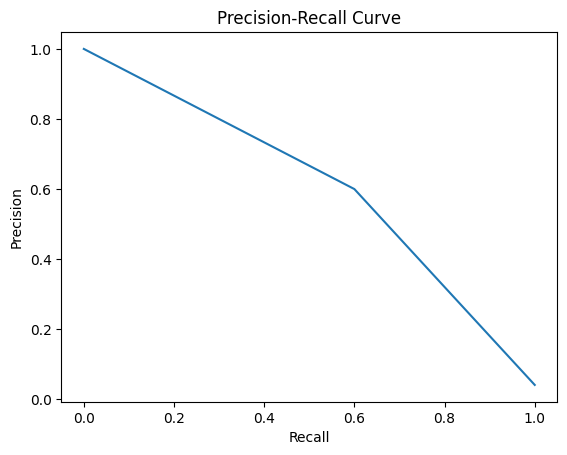

In [54]:
precision, recall, thresholds = precision_recall_curve(testing_targets, dtc_prediction)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [55]:
# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(training_samples,training_targets)
gnb_prediction = gnb.predict(testing_samples)
gnb_accuracy = 100.0 * accuracy_score(testing_targets, gnb_prediction)
print ("Gaussian Naive Bayes accuracy: " + str(gnb_accuracy))

Gaussian Naive Bayes accuracy: 98.36065573770492


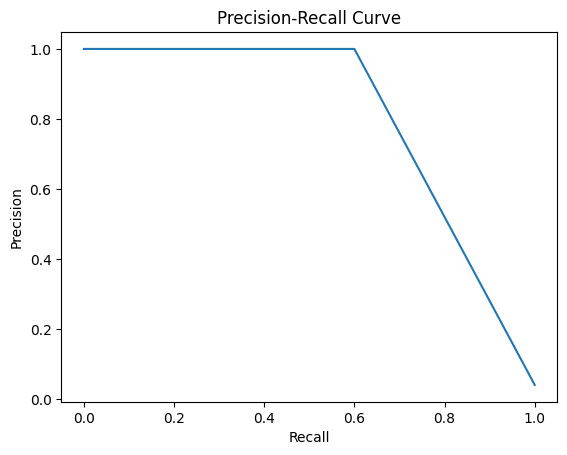

In [50]:
precision, recall, thresholds = precision_recall_curve(testing_targets, gnb_prediction)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
## CAN YOU CREATE A NN TO CLASSIFY?